<img src="iris_header.jpg">

The [Iris Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is arguably one of the most well-known and used database to understand classification techniques in machine learning. The data set contains three species of the Iris flower, namely, Setosa, Versicolor, and Virginica.

This exercise compares the accuracy of a logistic regression model and a decision tree model in predicting the species using the four features: sepal length, sepal width, petal length, and petal width.

### Findings
The logistic model had a better accuracy score of 97.8% with the test data, compared to the decision tree model's of 93.3%.  

Generally, these two models would be good to use to predict the species of the iris flower if the sepal's and petal's length and width are known. But if only one model is to be used, the logistic regression model below will be a better option.

### Quick Reference
I. [Acquire and Preprocess Data](#acquire)  
II. [Explore Data](#explore)  
III. [Create Logistic Regression Model](#log)  
III. [Create Decision Tree Model](#dtree)  

### Packages

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from split_scale import split_my_data
from acquire import get_iris_data
import prep

import warnings
warnings.filterwarnings("ignore")

### Acquire and Preprocess Data
<a id=acquire></a>

#### Acquire the Iris Dataset

In [2]:
df = get_iris_data()

#### Split Train-Test

In [3]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df[["species_name"]]

X_train, X_test, y_train, y_test = split_my_data(X,y,0.7)

#Combine X and y train into one dataframe for exploration
iris_train = X_train.copy()
iris_train["species_name"] = y_train.copy() 

### Explore Data
<a id=explore></a>

<Figure size 432x288 with 0 Axes>

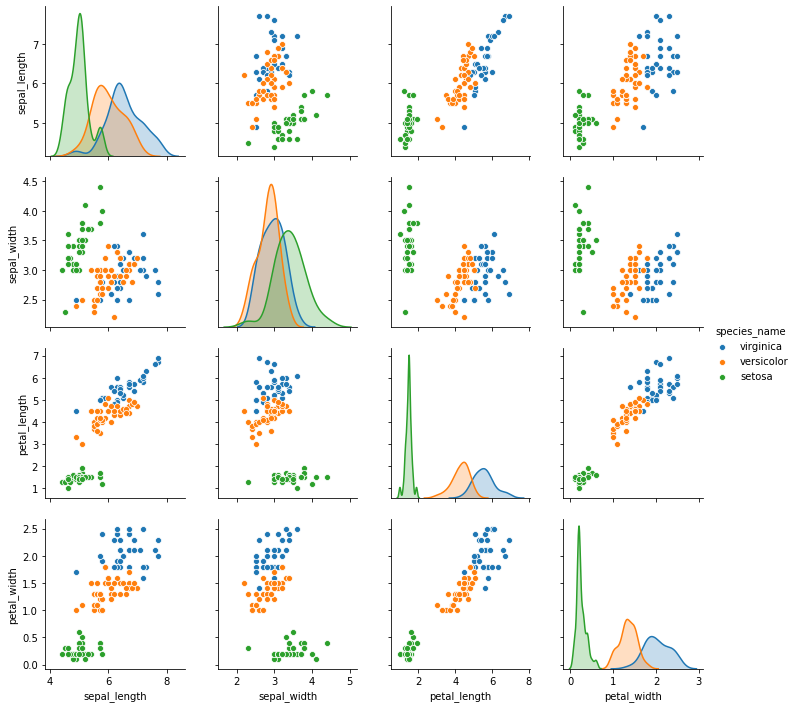

In [4]:
plt.figure()
scatter = sns.pairplot(iris_train, hue="species_name")

In [5]:
#Melt data to re-format data frame in a long-form computer-readable format
iris_melt = pd.melt(iris_train, id_vars=["species_name"], value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], var_name="feature",value_name="measurement")

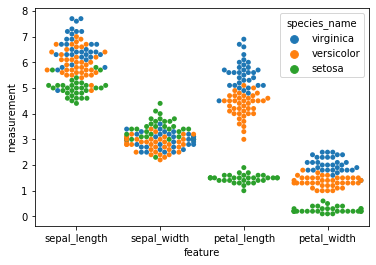

In [6]:
iris_swarm = sns.swarmplot(x="feature", y="measurement", hue="species_name",data=iris_melt)

**TAKEAWAYS**  
  
**Sepals**
- Setosas have shorter and wider sepals compated to Virginicas and Versicolors.
- Virginicas have the longest sepals among the three.  

**Petals**
- Among all the three species:
    - Setosas have the shortest and narrowest petals.
    - Versicolors have longer and wider petals than Setosas.
    - Virginica have the biggest petals in terms of length and width.

### Create Logistic Model
<a id=log></a>

Fit the logistic regression classifier to `iris_train` and make predictions using `X_train` and `X_test` for comparison.

In [7]:
log_model = LogisticRegression(C=1, random_state = 123, solver='liblinear').fit(X_train, y_train)
yhat_train = log_model.predict(X_train)

yhat_train = pd.DataFrame(yhat_train).set_index=y_train
yhat_test = pd.DataFrame(yhat_test).set_index=y_test

>Note: I experimented with different solvers including `saga` and found `liblinear` to produce the highest accuracy, so I pursued the latter.

Evaluate in-sample (train) results using the model score, confusion matrix, and classification report.

**Model's Score**

Run the model on both on train and test data (as opposed to test only) to check for model overfitting.

In [21]:
insample_score = log_model.score(X_train,y_train)
outofsample_score = log_model.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score,3)}
""")


Model's Accuracy when fitted to train data is
  0.952
Model's Accuracy when fitted to test data is
  0.978



**Confusion Matrix**

In [9]:
conf_matrix = confusion_matrix(y_test, yhat_test)

In [29]:
predicted_labels = ["p_setosa", "p_versicolor", "p_virginica"]
actual_labels = ["a_setosa", "a_versicolor", "a_virginica"]

conf_matrix = pd.DataFrame(conf_matrix, index=actual_labels, columns=predicted_labels)
conf_matrix

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,0,17


> Legend:  
p_ = predicted  
a_ = actual

**Classification Report**

In [36]:
cr = classification_report(y_test, yhat_test)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45



### Create Decision Tree Model
<a id=dtree></a>

Fit the decision tree classifier to `iris_train` and make predictions using `X_train` and `X_test` for comparison.

In [31]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=123)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

**Model's Score**

In [32]:
insample_score_dt = dt_model.score(X_train,y_train)
outofsample_score_dt = dt_model.score(X_test,y_test)

print(f"""
Model's Accuracy when fitted to train data is
  {round(insample_score_dt,3)}
Model's Accuracy when fitted to test data is
  {round(outofsample_score_dt,3)}
""")


Model's Accuracy when fitted to train data is
  0.981
Model's Accuracy when fitted to test data is
  0.933



**Confusion Matrix**

In [33]:
yhat_test_dt = dt_model.predict(X_test)

conf_matrix_dt = pd.DataFrame(confusion_matrix(y_test,yhat_test),index=actual_labels, columns=predicted_labels)
conf_matrix_dt

,p_setosa,p_versicolor,p_virginica
a_setosa,18,0,0
a_versicolor,0,10,0
a_virginica,0,3,14


**Classification Report**

In [35]:
cr_dt = classification_report(y_test, yhat_test_dt)
print(cr_dt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.93        45

